# Conectando ao Drive

In [1]:
## connecting to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Instalando a biblioteca principal

In [2]:
# Pip install (recommended)
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.5/644.5 kB 9.2 MB/s eta 0:00:00


# Instalando e importando complementos


In [3]:
## importing required libraries
import os
import shutil
import random
!pip install tqdm --upgrade
from tqdm.notebook import tqdm
from IPython import display
display.clear_output()
from ultralytics import YOLO
from IPython.display import display, Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.9/166.8 GB disk)


# Verificando a placa de video utilizada

In [4]:
!nvidia-smi

Wed Oct 18 20:36:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 300W |      2MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Apontando o local no drive e verificando o conteúdo

In [5]:
%cd /content/drive/MyDrive/yolov8
!ls

/content/drive/MyDrive/yolov8
CursoYolov8.ipynb


# Baixando o dataset escolhido


In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="XVCqAPU0e9xcodB0JX4l")
project = rf.workspace("alex-hyams-cosqx").project("dollar-bill-detection")
dataset = project.version(24).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstal

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.200, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Dollar-Bill-Detection-24 in yolov8:: 100%|██████████| 730/730 [00:06<00:00, 106.81it/s]


# Definindo os parâmetros de treinamento do modelo

In [8]:
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=50 imgsz=224 plots=True patience=0

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=50, patience=0, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=

# Listando os arquivos de resultados

In [9]:
!ls runs/detect/train2/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1697661684.3e460871f169.3712.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch600.jpg	weights
P_curve.png					    train_batch601.jpg
PR_curve.png					    train_batch602.jpg


# Matriz de Confusão

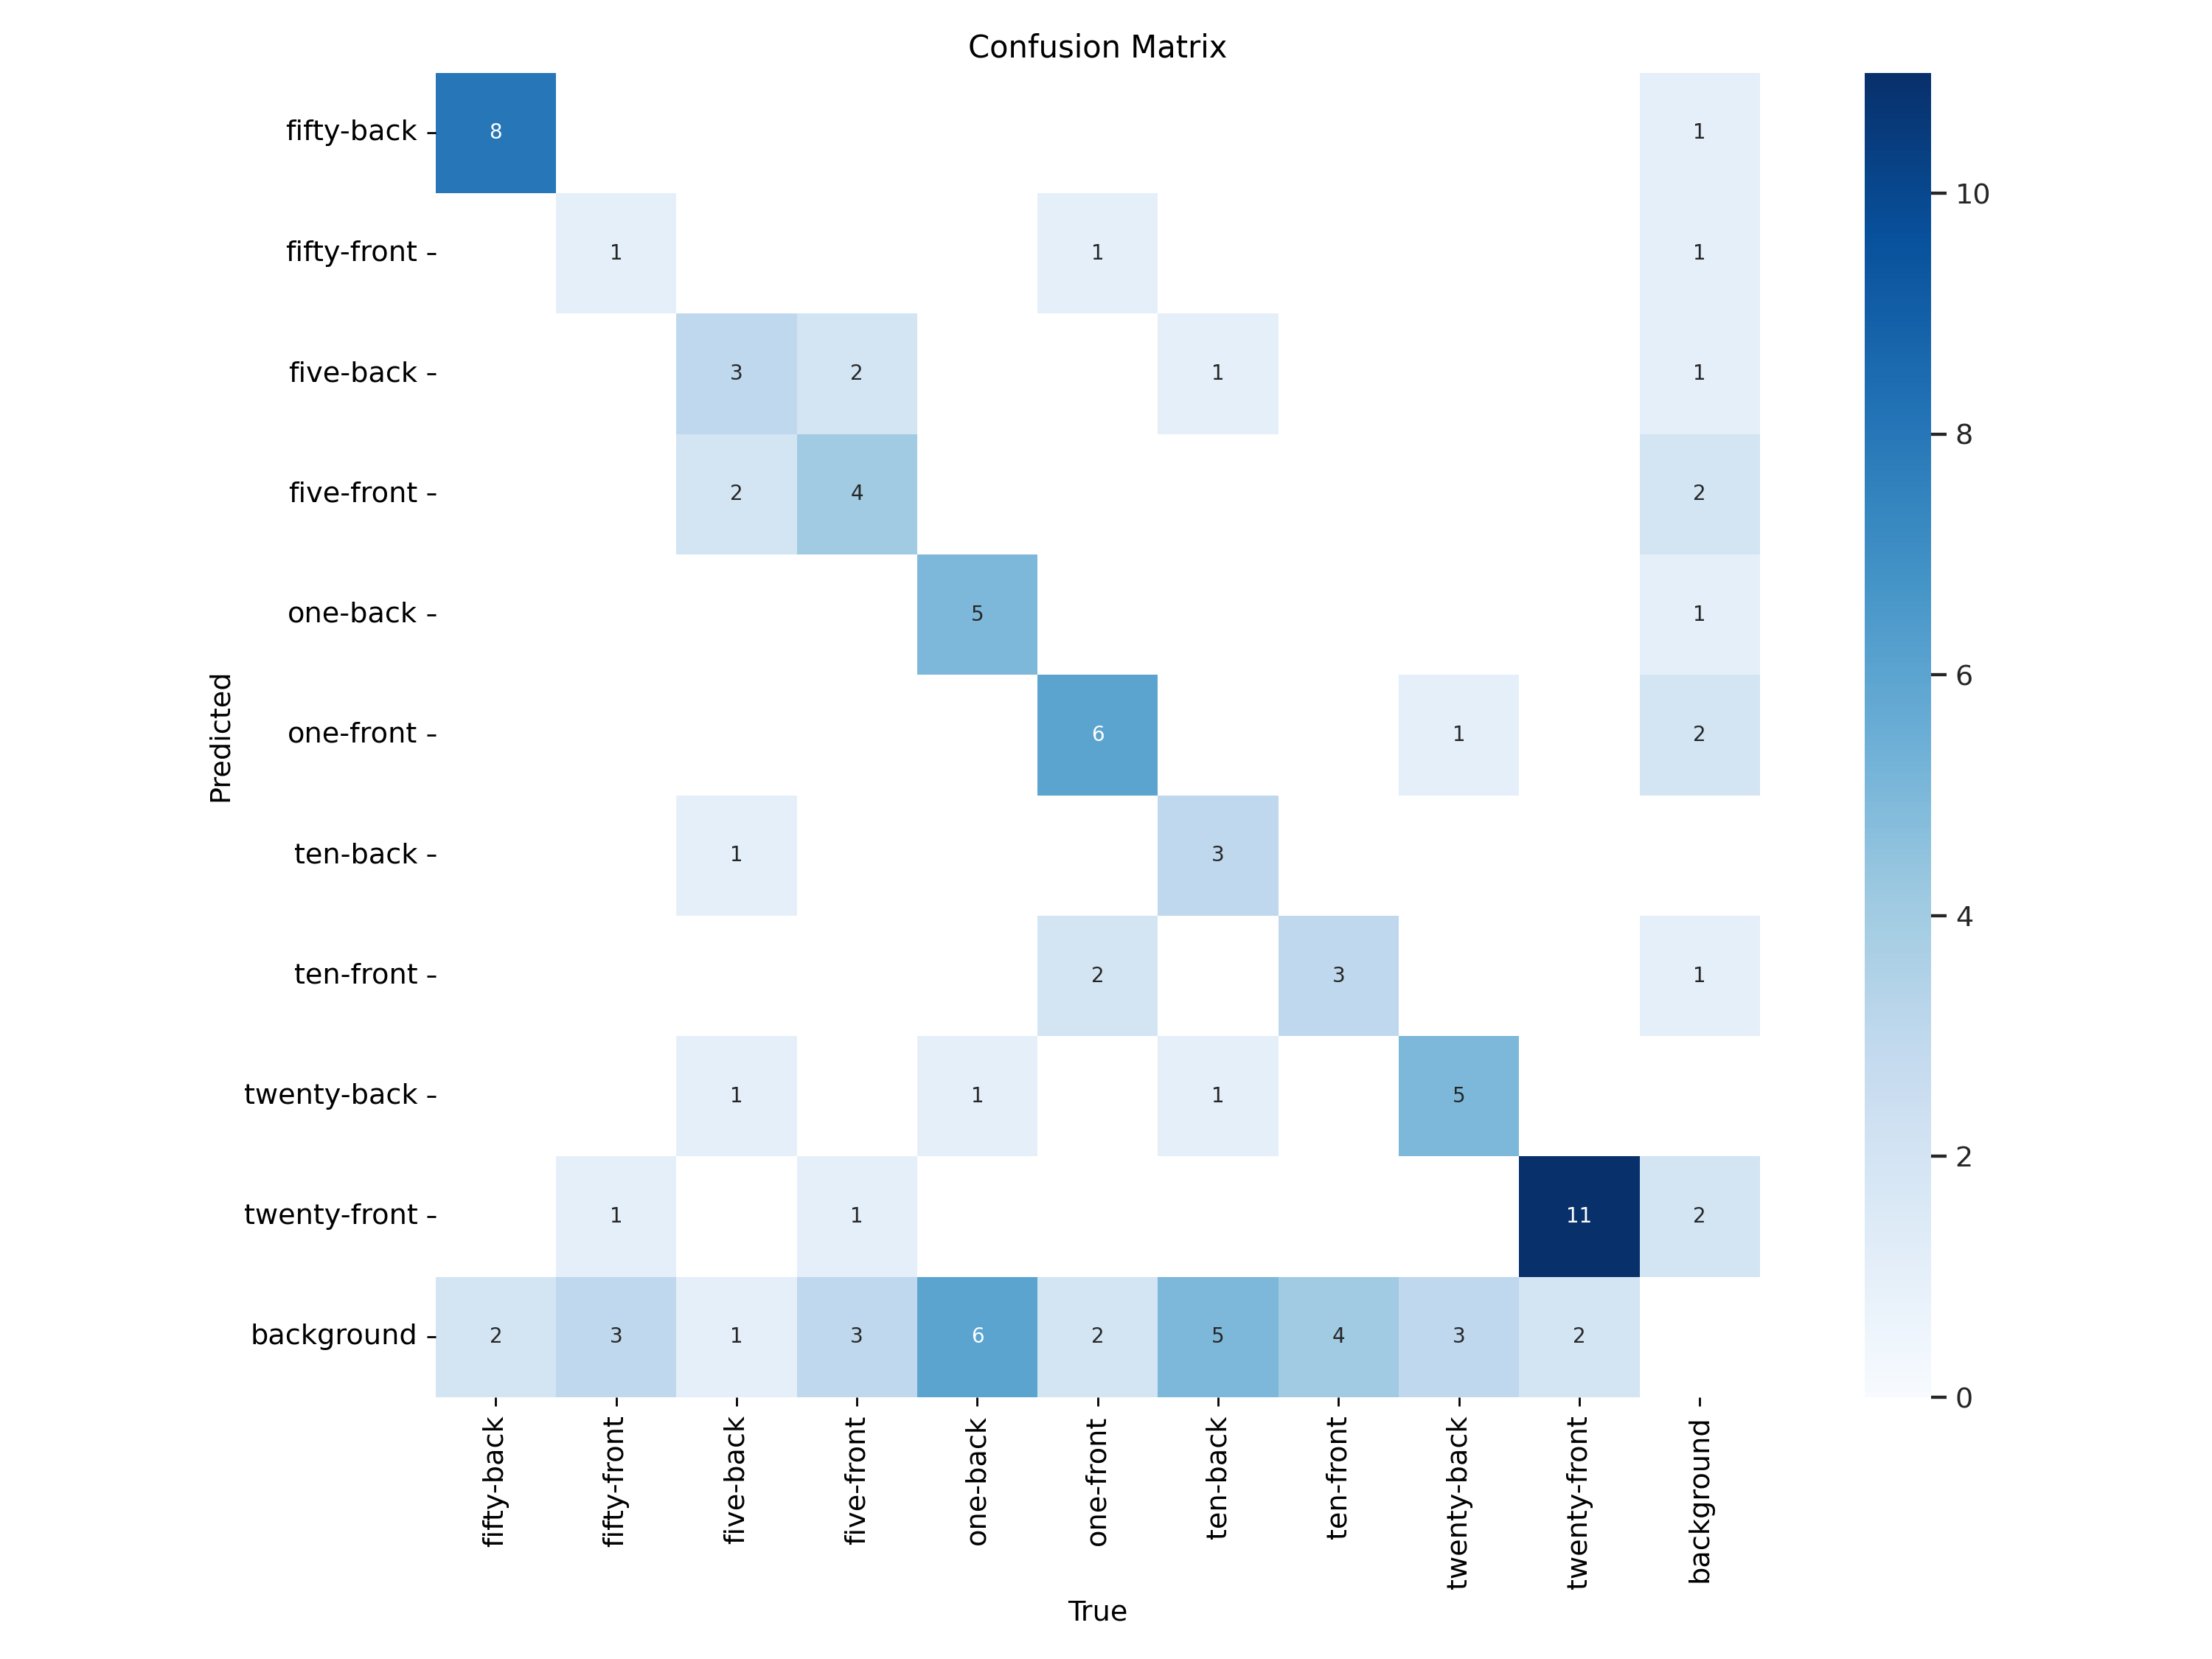

In [10]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

# Gráfico de Desempenho do Modelo Treinado

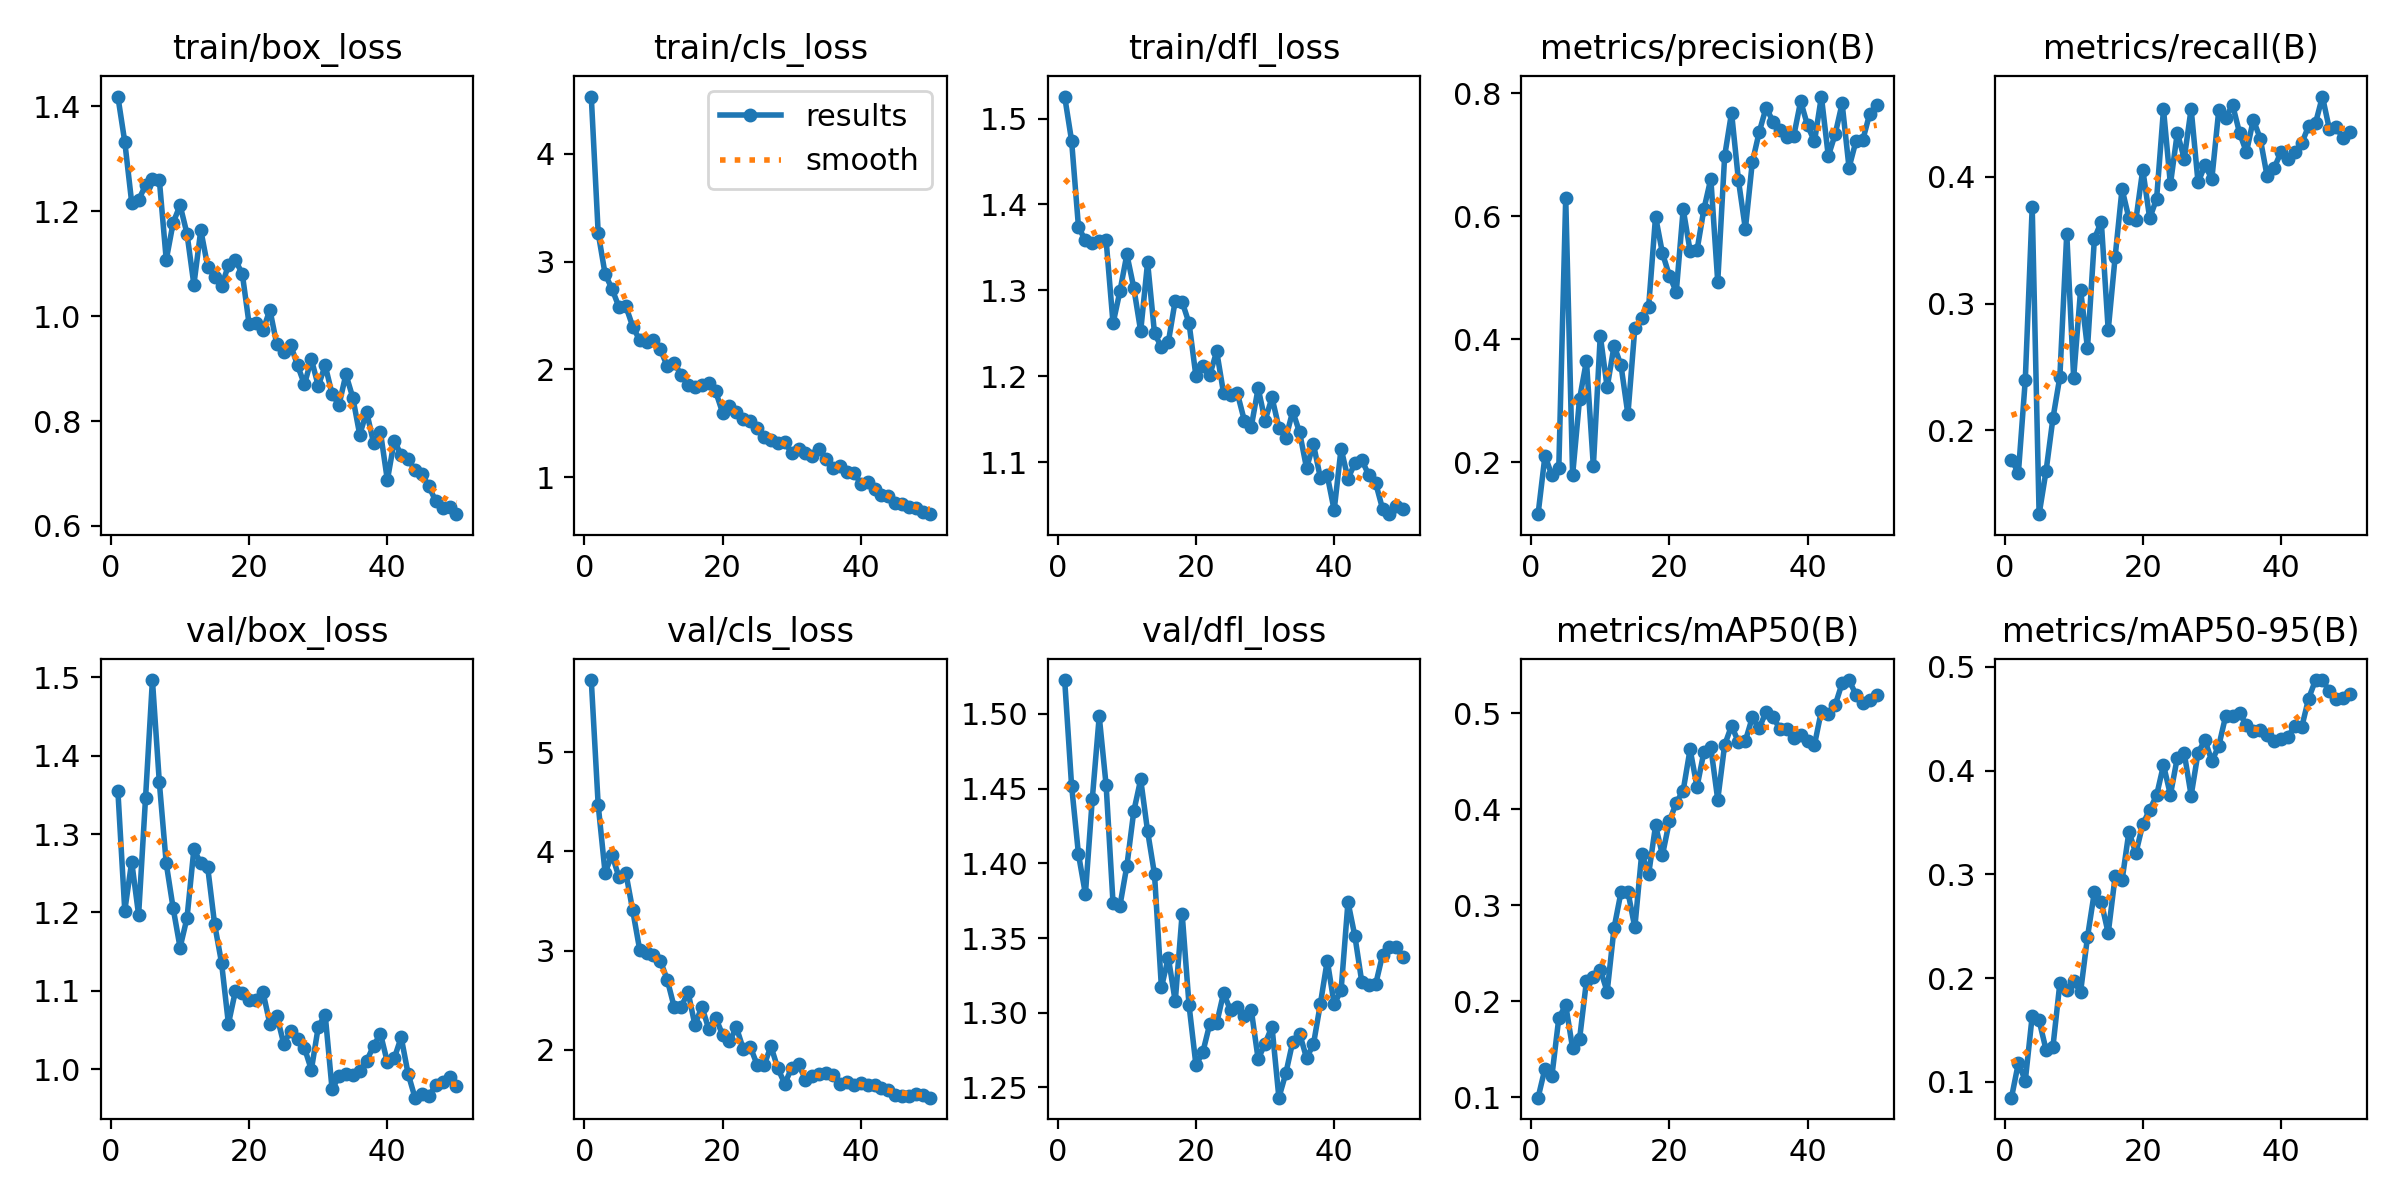

In [11]:
Image(filename='runs/detect/train2/results.png', width=600)

# Resultado de Predição com Grau de Confiança

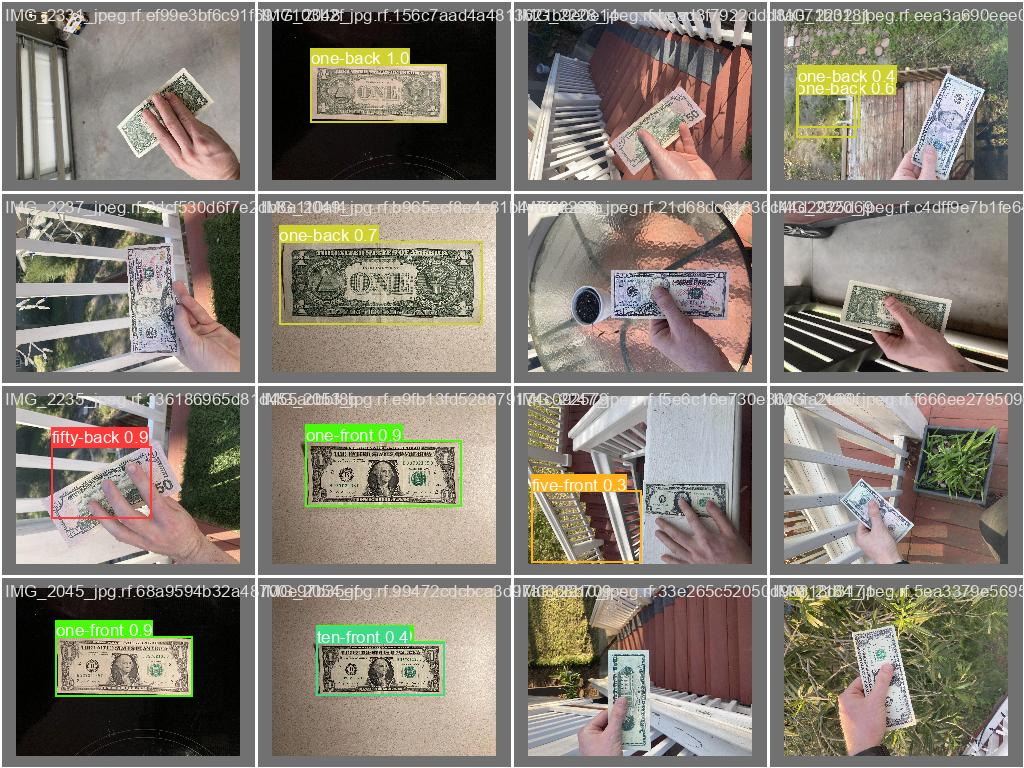

In [12]:
Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=600)

# Resultado de Predição apenas com o Box e Label

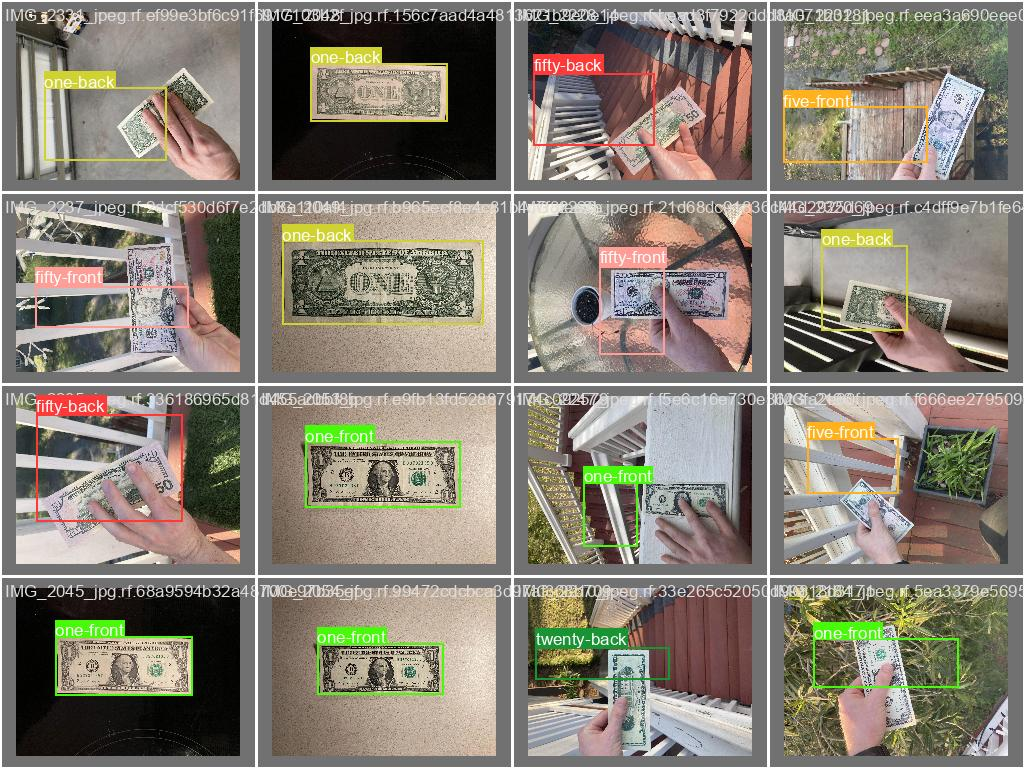

In [13]:
Image(filename='runs/detect/train2/val_batch0_labels.jpg', width=600)

# Carregando o Modelo e fazendo Inferência com base em fotos de uma pasta

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source=duasimagens save=True

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients

image 1/2 /content/drive/MyDrive/yolov8/duasimagens/Captura-de-pantalla--320-_png.rf.b9c762794ee364091234a1253b3e5496.jpg: 224x224 1 Mario, 1 moneda, 6.9ms
image 2/2 /content/drive/MyDrive/yolov8/duasimagens/Captura-de-pantalla--390-_png.rf.d5941e007e294ac0338d10f77188a0fa.jpg: 224x224 1 Mario, 3 monedas, 1 planta carnivora, 7.4ms
Speed: 2.6ms preprocess, 7.1ms inference, 49.3ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict


# Mostrando o resultado dessas duas imagens

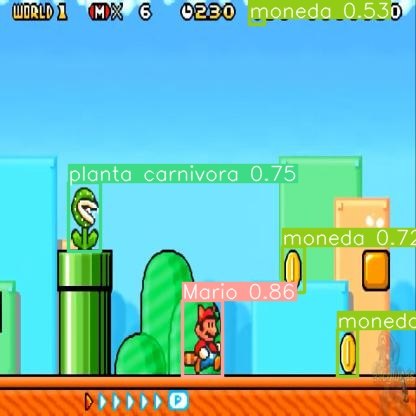

In [ ]:
Image(filename='runs/detect/predict/Captura-de-pantalla--390-_png.rf.d5941e007e294ac0338d10f77188a0fa.jpg', width=600)

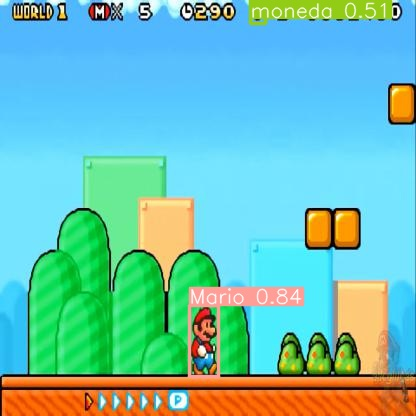

In [ ]:
Image(filename='runs/detect/predict/Captura-de-pantalla--320-_png.rf.b9c762794ee364091234a1253b3e5496.jpg', width=600)

# Inferência em video


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt  conf=0.5 source=/content/drive/MyDrive/yolov8/videos save=True

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients

video 1/1 (1/1425) /content/drive/MyDrive/yolov8/videos/Mario.mp4: 128x224 1 Mario, 120.0ms
video 1/1 (2/1425) /content/drive/MyDrive/yolov8/videos/Mario.mp4: 128x224 (no detections), 7.0ms
video 1/1 (3/1425) /content/drive/MyDrive/yolov8/videos/Mario.mp4: 128x224 (no detections), 6.5ms
video 1/1 (4/1425) /content/drive/MyDrive/yolov8/videos/Mario.mp4: 128x224 (no detections), 6.6ms
video 1/1 (5/1425) /content/drive/MyDrive/yolov8/videos/Mario.mp4: 128x224 (no detections), 6.4ms
video 1/1 (6/1425) /content/drive/MyDrive/yolov8/videos/Mario.mp4: 128x224 (no detections), 6.3ms
video 1/1 (7/1425) /content/drive/MyDrive/yolov8/videos/Mario.mp4: 128x224 (no detections), 6.2ms
video 1/1 (8/1425) /content/drive/MyDrive/yolov8/videos/Mario.mp4: 128x224 1 Goomba, 6.2ms
video 1/1 (9/1425) /content/drive/MyDrive/yolov8/videos/Mar

# Command Line Interface:


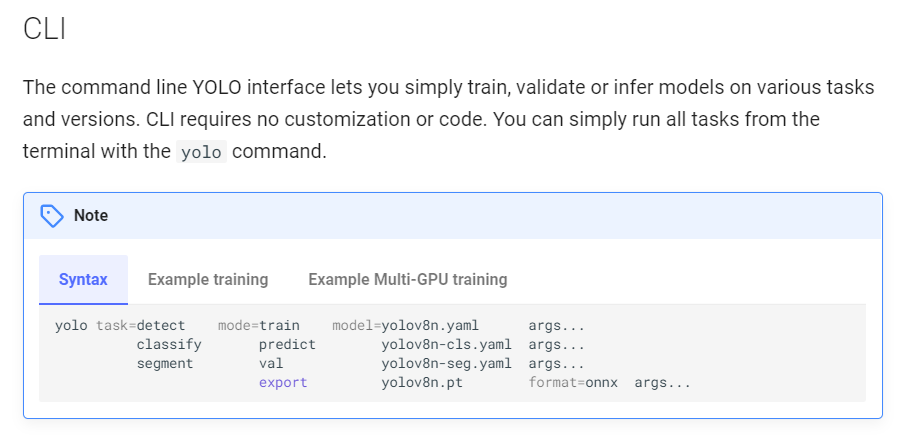

## Export the model -- In progress

Export a YOLOv8 model to any supported format with the `format` argument, i.e. `format=onnx`.

Format                  | `format=...**bold text**`         | Model
---                     | ---                       | ---
PyTorch                 | -                         | yolov8n.pt
TorchScript             | `torchscript`             | yolov8n.torchscript
ONNX                    | `onnx`                    | yolov8n.onnx
OpenVINO                | `openvino`                | yolov8n_openvino_model/
TensorRT                | `engine`                  | yolov8n.engine
CoreML                  | `coreml`                  | yolov8n.mlmodel
TensorFlow SavedModel   | `saved_model`             | yolov8n_saved_model/
TensorFlow GraphDef     | `pb`                      | yolov8n.pb
TensorFlow Lite         | `tflite`                  | yolov8n.tflite
TensorFlow Edge TPU     | `edgetpu`                 | yolov8n_edgetpu.tflite
TensorFlow.js           | `tfjs`                    | yolov8n_web_model/
PaddlePaddle            | `paddle`                  | yolov8n_paddle_model/